# Capstone Project: Using Supervised Learning to predict whether a Patient has a liver disease or not.

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

The doctors need us to classify the patients checking if they have the liver disease or not. 

The patients' data has been given in the 'indian_liver_patient.csv' file

<pre>
The features in the dataset:
•	Age of the patient 
•	Gender of the patient 
•	Total Bilirubin 
•	Direct Bilirubin 
•	Alkaline Phosphotase 
•	Alamine Aminotransferase 
•	Aspartate Aminotransferase 
•	Total Proteins 
•	Albumin 
•	Albumin and Globulin Ratio 
•	Dataset: field used to split the data into two sets (patient with liver disease, or no disease)
</pre>

These features tell us about the age, gender, levels of different chemicals, levels of proteins etc. 

A total of 583 rows and 11 columns.


In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Liver patients dataset
data = pd.read_csv("indian_liver_patient.csv")

#Copying the 'yes' or 'no' data to labels.
labels = data['Dataset']

#Dropping the feature from the dataset
features_raw = data.drop('Dataset', axis = 1)

#Displays the first 10 rows from the dataset
display(features_raw.head(n=10))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30
5,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00
6,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10
7,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20
8,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00
9,57,Male,0.6,0.1,210,51,59,5.9,2.7,0.80


# Converting Categorical Data to Numerical Data

Here, we are converting the categorical data of Gender, which has 'Male' or 'Female' into 0 or 1 by using the get_dummies() method in Pandas.


In [626]:
features_raw = pd.get_dummies(features_raw)
display(features_raw.head())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
3,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1
4,46,1.8,0.7,208,19,14,7.6,4.4,1.30,0,1


# Checking for Null Values

We check for the null values by using the following command:

In [627]:
features_raw.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Gender_Female                 0
Gender_Male                   0
dtype: int64

# Filling up the Null Values

As we can see that there are 4 Null values in the 'Albumin_and_Globulin_Ratio' feature, we fill them up by calculating the mean of the values in 'Albumin_and_Globulin_Ratio' and replacing the NaN with the mean.

In [628]:
mean = round(data['Albumin_and_Globulin_Ratio'].mean(), 2)
features_raw = features_raw.fillna(mean)

In [629]:
features_raw.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [630]:
display(features_raw.head())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
3,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1
4,46,1.8,0.7,208,19,14,7.6,4.4,1.30,0,1


# Visualization
We'll try to visualize the data now.

Text(0.5,1,'Heatmap of Correlation Matrix')

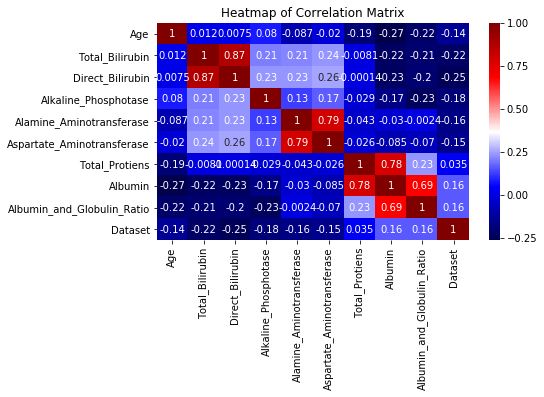

In [631]:
# Visualize skewed continuous features of original data
import seaborn as sns

fig = plt.figure(figsize=(7,4))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

The following features seem to be highly correlated:
* Total_Bilirubin - Direct_Bilirubin
* Alamine_Aminotransferase - Aspartate_Aminotransferase
* Albumin - Total_Proteins
* Albumin - Albumin_and_Globulin_Ratio

# Train, Test, Split

Now, we calculate the X_train, X_test, y_train, y_test values from train_test_split() function with the inputs of features_raw and labels.

In [632]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    labels, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
display(X_train.head())

Training set has 437 samples.
Testing set has 146 samples.


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
213,38,1.7,1.0,180,18,34,7.2,3.6,1.0,0,1
532,46,1.4,0.4,298,509,623,3.6,1.0,0.3,1,0
361,55,1.1,0.3,215,21,15,6.2,2.9,0.8,0,1
443,61,0.8,0.2,163,18,19,6.3,2.8,0.8,0,1
399,66,0.7,0.2,162,24,20,6.4,3.2,1.0,1,0


# Training the model

We train the benchmark model with the data that we have and use our chosen benchmark metrics to see how our model performs on the data. We can see that the model performs well with the data, looking at the F-beta score and the accuracy score. 

In [633]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,fbeta_score

clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train, y_train)

pred = clf.predict(X_test)
fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.782258064516 
Accuracy:  0.712328767123


### Now, let's see if we can do better:

# Preprocessing

We normalize the data by using one of the scaling methods like Standard Scaler.

I've tried both MinMaxScaler and StandardScaler, StandardScaler gives me the best results.

In [634]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#numerical = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

scaler = StandardScaler()
features_raw[:]= scaler.fit_transform(features_raw[:])

display(features_raw.head())

#df=pd.DataFrame(data=k[1:,1:],index=k[1:,0],columns=k[0,1:])
#print(list(df.columns.values))
#binwidth = 10
#plt.hist(features_raw,bins=[0, 10, 20, 30, 40, 50, 100])



,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650760,-0.567446,0.567446
1,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179386,-0.567446,0.567446
2,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166288,-0.567446,0.567446
3,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719207,-0.567446,0.567446
4,0.077514,-0.241578,-0.280143,-0.340199,-0.338224,-0.332250,1.029773,1.582902,1.109036,-0.567446,0.567446


# Train, Test, Split on the Normalized Data

Again, we apply the train_test_split on the normalized features to get X_train, X_test, y_train, y_test.

In [670]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    labels, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 437 samples.
Testing set has 146 samples.


# Imbalanced Data

The plot shows a major imbalance between the 'Yes' and 'No' values. Hence, Accuracy score wouldn't be a good metric for evaluation. Instead, we can use the F-beta score to get a better evaluation of our model.

(array([ 416.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  167.]),
 array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 10 Patch objects>)

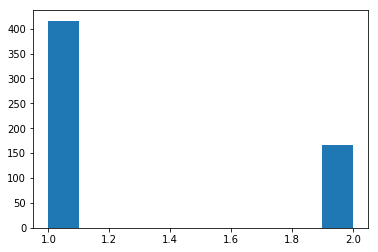

In [636]:
plt.hist(labels)

# Benchmark Model

We test the data with the benchmark model to see if it's doing good with the normalized data.

In [637]:
flist = []

In [638]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,fbeta_score

clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
flist.append(fscore)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.779220779221 
Accuracy:  0.705479452055


As we can see that it got worse compared to the raw data, we should consider checking it out with different models.

# Testing out with different Supervised Learning models

We try to fit the data into different models to see how it's doing with the other models. If these models have higher values for the metrics, we can consider these for the data.

## Gradient Boosting 

In [639]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,fbeta_score

clf = GradientBoostingClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
flist.append(fscore)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.785472972973 
Accuracy:  0.705479452055


## AdaBoost

In [640]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,fbeta_score

clf = AdaBoostClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
importances = clf.feature_importances_
#print(importances)

fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
flist.append(fscore)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.804794520548 
Accuracy:  0.732876712329


## Random Forest Classifier

In [641]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,fbeta_score

clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
flist.append(fscore)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.80298013245 
Accuracy:  0.739726027397


## Stochastic Gradient Descent Classifier

In [642]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,fbeta_score

clf = SGDClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
flist.append(fscore)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.818181818182 
Accuracy:  0.678082191781


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Decision Tree Classifier

In [643]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,fbeta_score

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
flist.append(fscore)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.78488372093 
Accuracy:  0.671232876712


# Choosing the best model

I choose the SGDClassifier as it outperforms all the other models in out benchmark metrics. It is now the time to make the score even better by applying the GridSearchCV

# Grid Search

In [644]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
#import parfit.parfit as pf

# Initializing the classifier
clf = SGDClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Creating the parameters list to tune, using a dictionary.
# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'n_iter':[3, 5, 7], 'warm_start':[True, False], 'shuffle':[True, False]}

"""grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000, 100, 15], # number of epochs
    'loss': ['log', 'squared_loss', 'squared_epsilon_insensitive', 'huber'], # logistic regression,
    'penalty': ['l2', 'l1', 'elasticnet', 'None'],
    'n_jobs': [-1]
}"""

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5], # learning rate
    'n_iter': [1000, 250, 75], # number of epochs
    'loss': ['log', 'squared_loss'], # logistic regression,
    'penalty': ['l2', 'l1', 'elasticnet'],
    'n_jobs': [-1]
}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
#grid_obj = GridSearchCV(SGDClassifier(random_state=0), scoring=scorer, param_grid=grid)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaco

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-pac

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-pac

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\sit

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

Unoptimized model
------
Accuracy score on testing data: 0.6781
F-score on testing data: 0.8182

Optimized Model
------
Final accuracy score on the testing data: 0.6918
Final F-score on the testing data: 0.8008


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages

We can see that the GridSearchCV performs almost similar to our model. 

# Feature Importance

I'll try to decrease the features and see if we can get a better result. We can get the most important features by the attribute 'feature_importances' from the AdaBoostClassifier. 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650760,-0.567446,0.567446
1,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179386,-0.567446,0.567446
2,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166288,-0.567446,0.567446
3,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719207,-0.567446,0.567446
4,0.077514,-0.241578,-0.280143,-0.340199,-0.338224,-0.332250,1.029773,1.582902,1.109036,-0.567446,0.567446


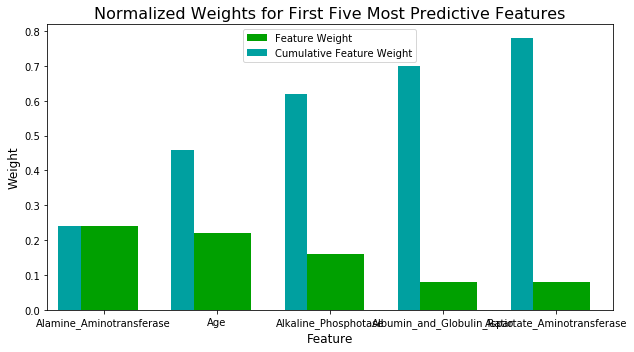

In [645]:
display(features_raw.head())
vs.feature_plot(importances, X_train, y_train)

In [646]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,fbeta_score

clf = SGDClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fscore = fbeta_score(y_test, pred,beta=0.5)
acc = accuracy_score(y_test, pred)
print("F-score: ",fscore,"\nAccuracy: ",acc)

F-score:  0.818181818182 
Accuracy:  0.678082191781


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [648]:

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

#clf = SGDClassifier()
clf = SGDClassifier()
clf = clf.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, pred, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.6781
F-score on testing data: 0.8182

Final Model trained on reduced data
------
Accuracy on testing data: 0.7397
F-score on testing data: 0.7803


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [677]:
"""from sklearn.metrics import roc_curve, roc_auc_score

LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
GB = GradientBoostingClassifier()
GB = GB.fit(X_train, y_train)
AB = AdaBoostClassifier()
AB = AB.fit(X_train, y_train)
RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
SG = SGDClassifier()
SG = SG.fit(X_train, y_train)
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)

#X_test = np.array(X_test)
display(X_test)

lr1, lr2, lr_thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
gb1, gb2, gb_thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:,1])
ab1, ab2, ab_thresholds = roc_curve(y_test, AB.predict_proba(X_test)[:,1])
rf1, rf2, rf_thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
sg1, sg2, sg_thresholds = roc_curve(y_test, SG.predict_proba(X_test)[:,1])
dt1, dt2, dt_thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(lr1, lr2, label='Logistic Regression (area = %0.2f)' % flist[0])

# Plot Gradient Boosting ROC
plt.plot(gb1, gb2, label='Gradient Boosting (area = %0.2f)' % flist[1])

# Plot Adaboost ROC
plt.plot(ab1, ab2, label='Adaboost (area = %0.2f)' % flist[2])

#plot Random Forest ROC
plt.plot(rf1, rf2, label='SVC (area = %0.2f)' % flist[3])

#plot SGD ROC
plt.plot(sg1, sg2, label='SGD (area = %0.2f)' % flist[4])

# Plot Decision Tree Classifier ROC
plt.plot(oab1, oab2, label='optimised Adaboost (area = %0.2f)' % flist[5])

# Plot Base Rate ROC

plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()"""

'from sklearn.metrics import roc_curve, roc_auc_score\n\nLR = LogisticRegression()\nLR = LR.fit(X_train, y_train)\nGB = GradientBoostingClassifier()\nGB = GB.fit(X_train, y_train)\nAB = AdaBoostClassifier()\nAB = AB.fit(X_train, y_train)\nRF = RandomForestClassifier()\nRF = RF.fit(X_train, y_train)\nSG = SGDClassifier()\nSG = SG.fit(X_train, y_train)\nDT = DecisionTreeClassifier()\nDT = DT.fit(X_train, y_train)\n\n#X_test = np.array(X_test)\ndisplay(X_test)\n\nlr1, lr2, lr_thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])\ngb1, gb2, gb_thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:,1])\nab1, ab2, ab_thresholds = roc_curve(y_test, AB.predict_proba(X_test)[:,1])\nrf1, rf2, rf_thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])\nsg1, sg2, sg_thresholds = roc_curve(y_test, SG.predict_proba(X_test)[:,1])\ndt1, dt2, dt_thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])\n\nplt.figure()\n\n# Plot Logistic Regression ROC\nplt.plot(lr1, lr2, label=\'Lo

# Conclusion

As we can see that reducing the features doesn't work. I choose the initial SGDClassifier() model with the Accuracy score 0.6781 and F-score 0.8182 as the best fit model to this data.